In [4]:
%%capture
import warnings
warnings.filterwarnings('ignore')

import calitp_data_analysis.magics

from rt_analysis import rt_filter_map_plot
import update_vars_index

from IPython.display import display, Markdown
import shared_utils

In [5]:
## parameters cell
itp_id = 282

In [13]:
analysis_date = shared_utils.rt_dates.DATES['aug2024']
import datetime as dt
if itp_id == 293:
    analysis_date = shared_utils.rt_dates.DATES['jul2024']
elif itp_id == 170:
    analysis_date = shared_utils.rt_dates.DATES['may2024']
elif itp_id == 48:
    analysis_date = shared_utils.rt_dates.DATES['mar2024']

if type(analysis_date) == str: analysis_date = dt.date.fromisoformat(analysis_date)

In [14]:
%%capture_parameters
human_date = analysis_date.strftime('%B %d %Y (%A)')
human_date

{"human_date": "August 14 2024 (Wednesday)"}


In [15]:
%%capture
rt_day = rt_filter_map_plot.from_gcs(itp_id, analysis_date)

In [16]:
%%capture_parameters
organization_name = rt_day.organization_name
organization_name

{"organization_name": "City and County of San Francisco"}


# {organization_name}

## About These Maps:

* Each map shows bus (and rail, if applicable) speeds for {organization_name}, with a map each for the morning peak, midday, and afternoon peak periods on {human_date}.
* On the map, routes are split into segments corresponding to the distance between two stops, allowing you to focus on specific portions of the route experiencing a slowdown.
* Route segments are arrow-shaped to indicate direction of travel. Thicker segments indicate more frequent transit routes.
* State Highway Network routes are outlined in gray.
* Hover over, a segment with your mouse to see the exact speed, route name, and transit service frequency in that segment. 
    * Higher-frequency routes (3+ trips per hour) are especially important, since those slowdowns correspond to more vehicles, and riders, delayed in traffic.

## Morning Peak

In [17]:
%%capture
rt_day.set_filter(start_time='06:00', end_time='09:00')

### 20th Percentile Speeds by Segment

In [18]:
%%capture
_m = rt_day.segment_speed_map(how='low_speeds', no_title=True, shn=True,
                             no_render=True
                            )

In [19]:
%%capture
rt_day.map_gz_export(access_cmap=True)

In [20]:
rt_day.render_spa_link()

<a href="https://embeddable-maps.calitp.org/?state=eyJuYW1lIjogIm51bGwiLCAibGF5ZXJzIjogW3sibmFtZSI6ICJEMDQgU3RhdGUgSGlnaHdheSBOZXR3b3JrIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyNC0wOC0xNC8wNF9TSE4uZ2VvanNvbi5neiIsICJwcm9wZXJ0aWVzIjogeyJzdHJva2VkIjogZmFsc2UsICJoaWdobGlnaHRfc2F0dXJhdGlvbl9tdWx0aXBsaWVyIjogMC41fSwgInR5cGUiOiAic3RhdGVfaGlnaHdheV9uZXR3b3JrIn0sIHsibmFtZSI6ICJDaXR5IGFuZCBDb3VudHkgb2YgU2FuIEZyYW5jaXNjbyBBdWcgMTQsIDIwMjQgKFdlZCkgQU0gUGVhayIsICJ1cmwiOiAiaHR0cHM6Ly9zdG9yYWdlLmdvb2dsZWFwaXMuY29tL2NhbGl0cC1tYXAtdGlsZXMvc3BlZWRzXzIwMjQtMDgtMTQvMjgyX0FNX1BlYWtfc3BlZWRzX2NvbG9yX2FjY2Vzcy5nZW9qc29uLmd6IiwgInByb3BlcnRpZXMiOiB7InN0cm9rZWQiOiBmYWxzZSwgImhpZ2hsaWdodF9zYXR1cmF0aW9uX211bHRpcGxpZXIiOiAwLjUsICJ0b29sdGlwX3NwZWVkX2tleSI6ICJwMjBfbXBoIn0sICJ0eXBlIjogInNwZWVkbWFwIn1dLCAibGF0X2xvbiI6IFszNy43NTk5Mjc1ODU4NDY4OSwgLTEyMi40MzQzMDUxNDY4MTE3XSwgInpvb20iOiAxMywgImxlZ2VuZF91cmwiOiAiaHR0cHM6Ly9zdG9yYWdlLmdvb2dsZWFwaXMuY29tL2NhbGl0cC1tYXAtdGlsZXMvc3BlZWRzX2xlZ2VuZF9jb2xvcl9hY2Nlc3Muc3ZnIn0=" target="_blank">Open Full Map in New Tab</a>

In [21]:
rt_day.display_spa_map()

### Variation in Speeds by Segment

* This visualization shows variation as the ratio between the 80th percentile and 20th percentile speeds in each segment
* Segments with high variation in speeds make it difficult for transit operators to set accurate schedules, and can cause inconsistent service for riders

In [22]:
rt_day.map_variance(no_render=True)

In [23]:
%%capture
rt_day.map_gz_export(map_type = 'variance')

In [24]:
rt_day.render_spa_link()

<a href="https://embeddable-maps.calitp.org/?state=eyJuYW1lIjogIm51bGwiLCAibGF5ZXJzIjogW3sibmFtZSI6ICJEMDQgU3RhdGUgSGlnaHdheSBOZXR3b3JrIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyNC0wOC0xNC8wNF9TSE4uZ2VvanNvbi5neiIsICJwcm9wZXJ0aWVzIjogeyJzdHJva2VkIjogZmFsc2UsICJoaWdobGlnaHRfc2F0dXJhdGlvbl9tdWx0aXBsaWVyIjogMC41fSwgInR5cGUiOiAic3RhdGVfaGlnaHdheV9uZXR3b3JrIn0sIHsibmFtZSI6ICJDaXR5IGFuZCBDb3VudHkgb2YgU2FuIEZyYW5jaXNjbyBBdWcgMTQsIDIwMjQgKFdlZCkgQU0gUGVhayIsICJ1cmwiOiAiaHR0cHM6Ly9zdG9yYWdlLmdvb2dsZWFwaXMuY29tL2NhbGl0cC1tYXAtdGlsZXMvc3BlZWRzXzIwMjQtMDgtMTQvMjgyX0FNX1BlYWtfdmFyaWFuY2UuZ2VvanNvbi5neiIsICJwcm9wZXJ0aWVzIjogeyJzdHJva2VkIjogZmFsc2UsICJoaWdobGlnaHRfc2F0dXJhdGlvbl9tdWx0aXBsaWVyIjogMC41fSwgInR5cGUiOiAic3BlZWRfdmFyaWF0aW9uIn1dLCAibGF0X2xvbiI6IFszNy43NTk5Mjc1ODU4NDY4OSwgLTEyMi40MzQzMDUxNDY4MTE3XSwgInpvb20iOiAxMywgImxlZ2VuZF91cmwiOiAiaHR0cHM6Ly9zdG9yYWdlLmdvb2dsZWFwaXMuY29tL2NhbGl0cC1tYXAtdGlsZXMvdmFyaWFuY2VfbGVnZW5kLnN2ZyJ9" target="_blank">Open Full Map in New Tab</a>

In [25]:
rt_day.display_spa_map()

## Midday

In [26]:
%%capture
rt_day.set_filter(start_time='10:00', end_time='14:00')

### 20th Percentile Speeds by Segment

In [27]:
%%capture
_m = rt_day.segment_speed_map(how='low_speeds', no_title=True, shn=True,
                             no_render=True
                            )

In [28]:
%%capture
rt_day.map_gz_export(access_cmap=True)

In [29]:
rt_day.render_spa_link()

<a href="https://embeddable-maps.calitp.org/?state=eyJuYW1lIjogIm51bGwiLCAibGF5ZXJzIjogW3sibmFtZSI6ICJEMDQgU3RhdGUgSGlnaHdheSBOZXR3b3JrIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyNC0wOC0xNC8wNF9TSE4uZ2VvanNvbi5neiIsICJwcm9wZXJ0aWVzIjogeyJzdHJva2VkIjogZmFsc2UsICJoaWdobGlnaHRfc2F0dXJhdGlvbl9tdWx0aXBsaWVyIjogMC41fSwgInR5cGUiOiAic3RhdGVfaGlnaHdheV9uZXR3b3JrIn0sIHsibmFtZSI6ICJDaXR5IGFuZCBDb3VudHkgb2YgU2FuIEZyYW5jaXNjbyBBdWcgMTQsIDIwMjQgKFdlZCkgTWlkZGF5IiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyNC0wOC0xNC8yODJfTWlkZGF5X3NwZWVkc19jb2xvcl9hY2Nlc3MuZ2VvanNvbi5neiIsICJwcm9wZXJ0aWVzIjogeyJzdHJva2VkIjogZmFsc2UsICJoaWdobGlnaHRfc2F0dXJhdGlvbl9tdWx0aXBsaWVyIjogMC41LCAidG9vbHRpcF9zcGVlZF9rZXkiOiAicDIwX21waCJ9LCAidHlwZSI6ICJzcGVlZG1hcCJ9XSwgImxhdF9sb24iOiBbMzcuNzYwMzQ5MTI2NDAzMTQsIC0xMjIuNDMzNzEyMjU4NzQ4NDRdLCAiem9vbSI6IDEzLCAibGVnZW5kX3VybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfbGVnZW5kX2NvbG9yX2FjY2Vzcy5zdmcifQ==" target="_blank">Open Full Map in New Tab</a>

In [30]:
rt_day.display_spa_map()

### Variation in Speeds by Segment

* This visualization shows variation as the ratio between the 80th percentile and 20th percentile speeds in each segment
* Segments with high variation in speeds make it difficult for transit operators to set accurate schedules, and can cause inconsistent service for riders

In [31]:
rt_day.map_variance(no_render=True)

In [32]:
%%capture
rt_day.map_gz_export(map_type = 'variance')

In [33]:
rt_day.render_spa_link()

<a href="https://embeddable-maps.calitp.org/?state=eyJuYW1lIjogIm51bGwiLCAibGF5ZXJzIjogW3sibmFtZSI6ICJEMDQgU3RhdGUgSGlnaHdheSBOZXR3b3JrIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyNC0wOC0xNC8wNF9TSE4uZ2VvanNvbi5neiIsICJwcm9wZXJ0aWVzIjogeyJzdHJva2VkIjogZmFsc2UsICJoaWdobGlnaHRfc2F0dXJhdGlvbl9tdWx0aXBsaWVyIjogMC41fSwgInR5cGUiOiAic3RhdGVfaGlnaHdheV9uZXR3b3JrIn0sIHsibmFtZSI6ICJDaXR5IGFuZCBDb3VudHkgb2YgU2FuIEZyYW5jaXNjbyBBdWcgMTQsIDIwMjQgKFdlZCkgTWlkZGF5IiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyNC0wOC0xNC8yODJfTWlkZGF5X3ZhcmlhbmNlLmdlb2pzb24uZ3oiLCAicHJvcGVydGllcyI6IHsic3Ryb2tlZCI6IGZhbHNlLCAiaGlnaGxpZ2h0X3NhdHVyYXRpb25fbXVsdGlwbGllciI6IDAuNX0sICJ0eXBlIjogInNwZWVkX3ZhcmlhdGlvbiJ9XSwgImxhdF9sb24iOiBbMzcuNzYwMzQ5MTI2NDAzMTQsIC0xMjIuNDMzNzEyMjU4NzQ4NDRdLCAiem9vbSI6IDEzLCAibGVnZW5kX3VybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy92YXJpYW5jZV9sZWdlbmQuc3ZnIn0=" target="_blank">Open Full Map in New Tab</a>

In [34]:
rt_day.display_spa_map()

## Afternoon Peak

In [35]:
%%capture
rt_day.set_filter(start_time='15:00', end_time='19:00')

### 20th Percentile Speeds by Segment

In [36]:
%%capture
_m = rt_day.segment_speed_map(how='low_speeds', no_title=True, shn=True,
                             no_render=True
                            )

In [37]:
%%capture
rt_day.map_gz_export(access_cmap=True)

In [38]:
rt_day.render_spa_link()

<a href="https://embeddable-maps.calitp.org/?state=eyJuYW1lIjogIm51bGwiLCAibGF5ZXJzIjogW3sibmFtZSI6ICJEMDQgU3RhdGUgSGlnaHdheSBOZXR3b3JrIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyNC0wOC0xNC8wNF9TSE4uZ2VvanNvbi5neiIsICJwcm9wZXJ0aWVzIjogeyJzdHJva2VkIjogZmFsc2UsICJoaWdobGlnaHRfc2F0dXJhdGlvbl9tdWx0aXBsaWVyIjogMC41fSwgInR5cGUiOiAic3RhdGVfaGlnaHdheV9uZXR3b3JrIn0sIHsibmFtZSI6ICJDaXR5IGFuZCBDb3VudHkgb2YgU2FuIEZyYW5jaXNjbyBBdWcgMTQsIDIwMjQgKFdlZCkgUE0gUGVhayIsICJ1cmwiOiAiaHR0cHM6Ly9zdG9yYWdlLmdvb2dsZWFwaXMuY29tL2NhbGl0cC1tYXAtdGlsZXMvc3BlZWRzXzIwMjQtMDgtMTQvMjgyX1BNX1BlYWtfc3BlZWRzX2NvbG9yX2FjY2Vzcy5nZW9qc29uLmd6IiwgInByb3BlcnRpZXMiOiB7InN0cm9rZWQiOiBmYWxzZSwgImhpZ2hsaWdodF9zYXR1cmF0aW9uX211bHRpcGxpZXIiOiAwLjUsICJ0b29sdGlwX3NwZWVkX2tleSI6ICJwMjBfbXBoIn0sICJ0eXBlIjogInNwZWVkbWFwIn1dLCAibGF0X2xvbiI6IFszNy43NTk0NDk3MDc2MzU3OTUsIC0xMjIuNDMzMTY4NzAzMTk5OTddLCAiem9vbSI6IDEzLCAibGVnZW5kX3VybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfbGVnZW5kX2NvbG9yX2FjY2Vzcy5zdmcifQ==" target="_blank">Open Full Map in New Tab</a>

In [39]:
rt_day.display_spa_map()

### Variation in Speeds by Segment

* This visualization shows variation as the ratio between the 80th percentile and 20th percentile speeds in each segment
* Segments with high variation in speeds make it difficult for transit operators to set accurate schedules, and can cause inconsistent service for riders

In [40]:
rt_day.map_variance(no_render=True)

In [41]:
%%capture
rt_day.map_gz_export(map_type = 'variance')

In [42]:
rt_day.render_spa_link()

<a href="https://embeddable-maps.calitp.org/?state=eyJuYW1lIjogIm51bGwiLCAibGF5ZXJzIjogW3sibmFtZSI6ICJEMDQgU3RhdGUgSGlnaHdheSBOZXR3b3JrIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyNC0wOC0xNC8wNF9TSE4uZ2VvanNvbi5neiIsICJwcm9wZXJ0aWVzIjogeyJzdHJva2VkIjogZmFsc2UsICJoaWdobGlnaHRfc2F0dXJhdGlvbl9tdWx0aXBsaWVyIjogMC41fSwgInR5cGUiOiAic3RhdGVfaGlnaHdheV9uZXR3b3JrIn0sIHsibmFtZSI6ICJDaXR5IGFuZCBDb3VudHkgb2YgU2FuIEZyYW5jaXNjbyBBdWcgMTQsIDIwMjQgKFdlZCkgUE0gUGVhayIsICJ1cmwiOiAiaHR0cHM6Ly9zdG9yYWdlLmdvb2dsZWFwaXMuY29tL2NhbGl0cC1tYXAtdGlsZXMvc3BlZWRzXzIwMjQtMDgtMTQvMjgyX1BNX1BlYWtfdmFyaWFuY2UuZ2VvanNvbi5neiIsICJwcm9wZXJ0aWVzIjogeyJzdHJva2VkIjogZmFsc2UsICJoaWdobGlnaHRfc2F0dXJhdGlvbl9tdWx0aXBsaWVyIjogMC41fSwgInR5cGUiOiAic3BlZWRfdmFyaWF0aW9uIn1dLCAibGF0X2xvbiI6IFszNy43NTk0NDk3MDc2MzU3OTUsIC0xMjIuNDMzMTY4NzAzMTk5OTddLCAiem9vbSI6IDEzLCAibGVnZW5kX3VybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy92YXJpYW5jZV9sZWdlbmQuc3ZnIn0=" target="_blank">Open Full Map in New Tab</a>

In [43]:
rt_day.display_spa_map()

## Daily Speed Patterns

* This chart shows the distribution of median trip speeds throughout the day. It can help find times of day where transit riders experience the slowest overall speeds.

Median Trip Speed by Hour of Day, All Route Types, All Routes, 06:00–22:00, Aug 14, 2024 (Wed)

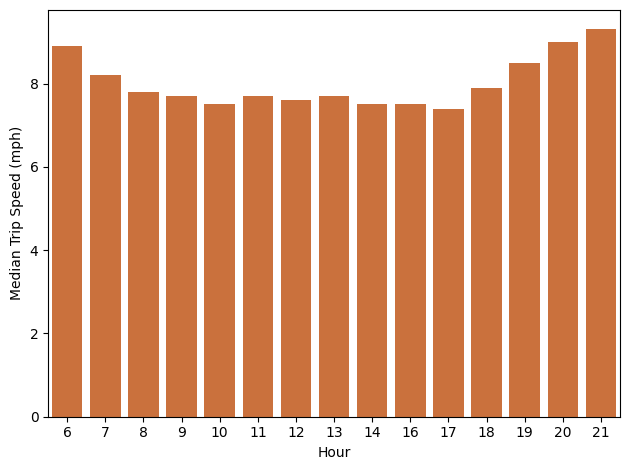

In [44]:
try:
    rt_day.set_filter(start_time='06:00', end_time='22:00')
    display(Markdown(f'Median Trip Speed by Hour of Day{rt_day.filter_formatted}'))

    rt_day.chart_speeds(no_title=True);
except:
    display(Markdown(f'Chart not available for this agency'))
    pass